In this Jupyter notebook, we'll explore the Discrete Fourier Transform (DFT) of a sine wave and its sine and cosine components. 

The Discrete Fourier Transform (DFT) for a sequence of \(N\) numbers \(x_n\) is a list of \(N\) complex numbers \(X_k\), where \(k\) is an integer ranging from 0 to \(N-1\). Each \(X_k\) is a frequency component, whose magnitude and phase encode information about the corresponding sinusoidal component in the original sequence. 

The formula for the \(k\)-th frequency component \(X_k\) is as follows:

$$X_k = \sum_{n=0}^{N-1} x_n \cdot (\cos(2\pi nk/N) - i \cdot \sin(2\pi nk/N))$$

The real part of \(X_k\) corresponds to the cosine component and the imaginary part to the sine component.


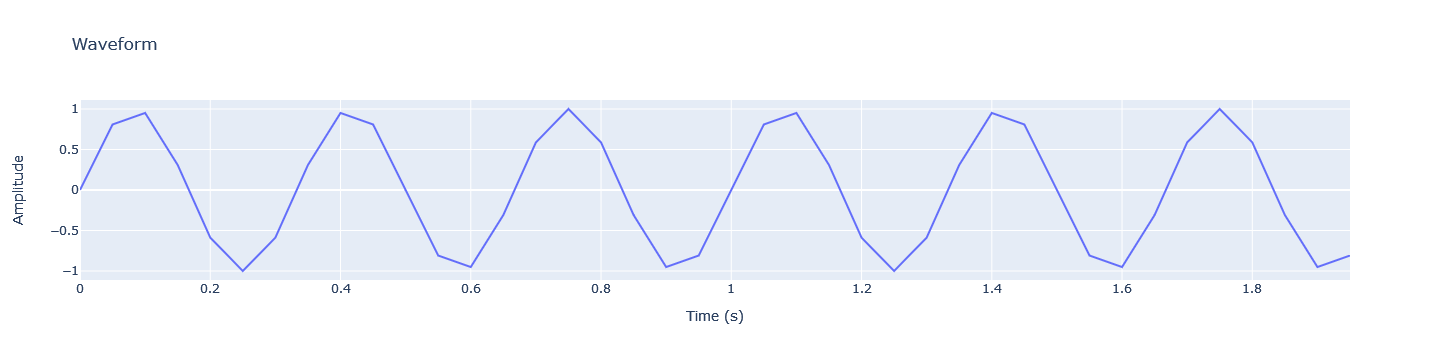

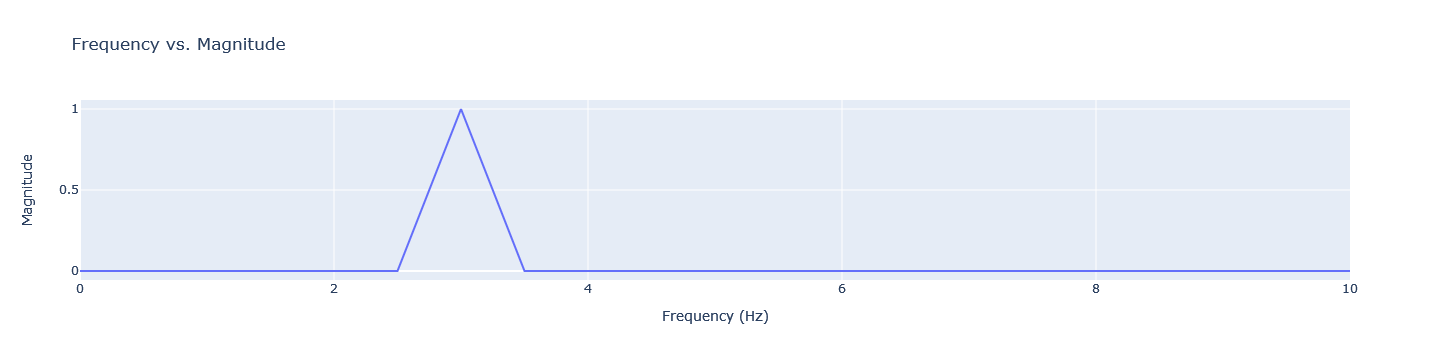

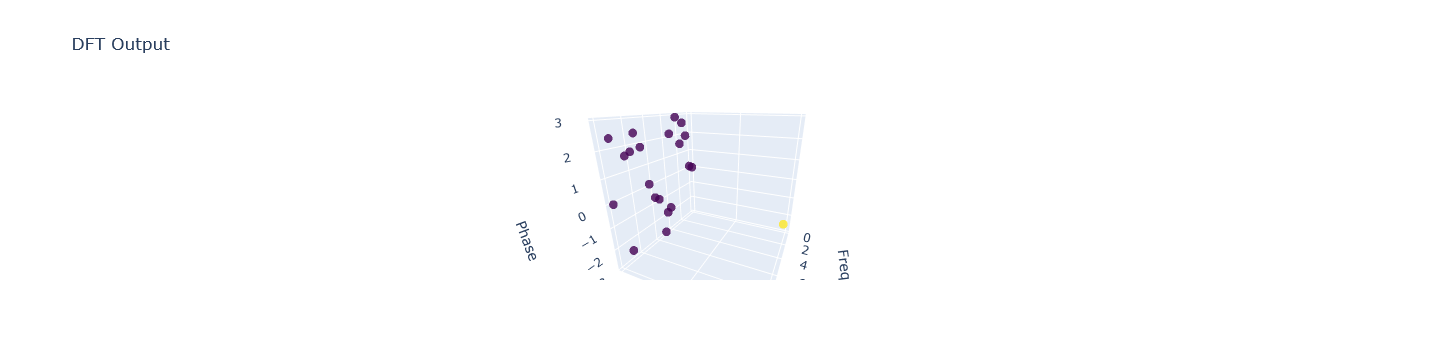

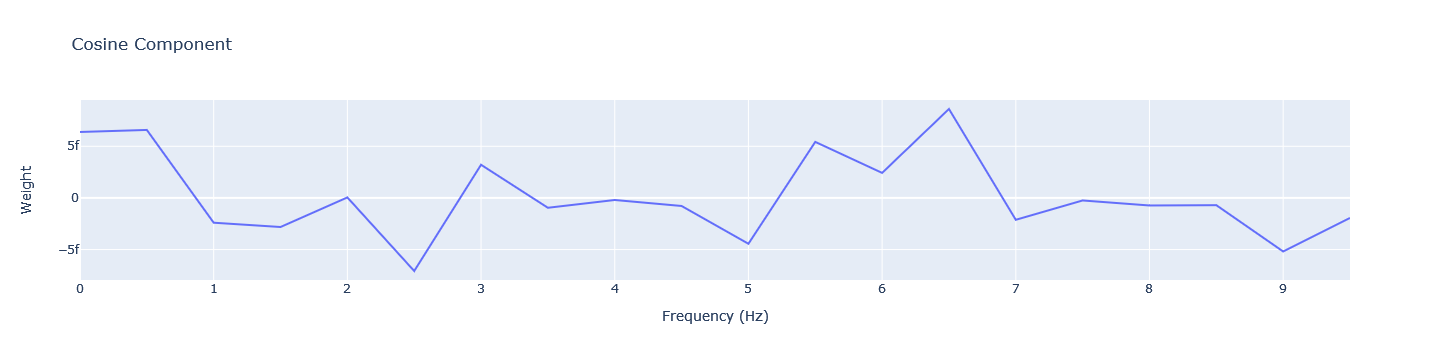

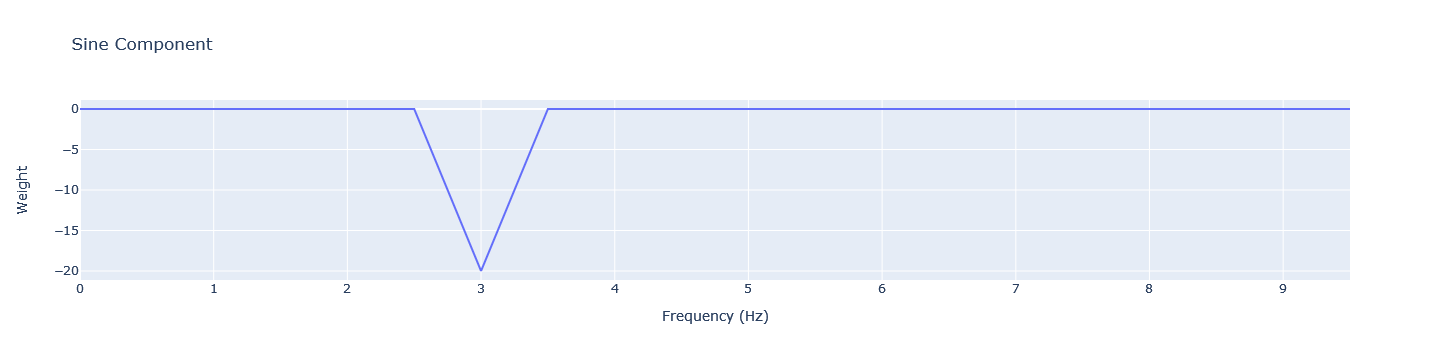

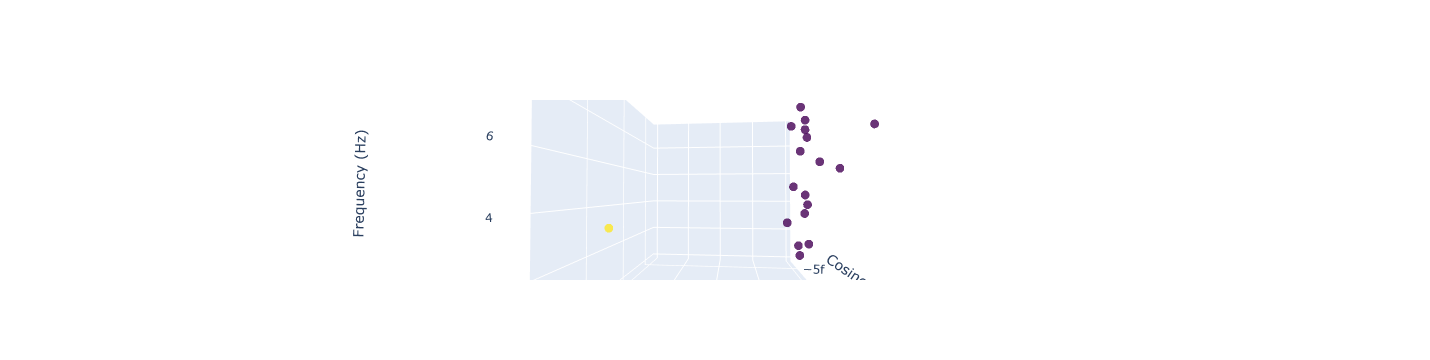

In [13]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from scipy.fft import fft

# Sampling parameters
step_size = 0.05  # Sampling interval in seconds
T = 2.0  # Total duration of the signal in seconds
N = int(T / step_size)  # Total number of samples

# Define the time vector
t = np.linspace(0.0, T, N, endpoint=False)

# Signal parameters
amp1 = 1.0
freq1 = 3.0
phase1 = 0.0

# Generate the sine wave
y1 = amp1 * np.sin(2 * np.pi * freq1 * t + phase1)

# Perform the FFT
yf = fft(y1)

# Calculate the number of bins and generate frequency bins with 0.5 Hz step
Fs = 1.0 / step_size  # Sampling frequency
Nyquist_Freq = Fs / 2  # Nyquist frequency
num_bins = int(Nyquist_Freq / 0.5) + 1  # Calculate number of bins required
xf = np.arange(0, num_bins) * 0.5  # Generate frequency bins with 0.5 Hz step

# Extract magnitude and phase for the adjusted number of bins
magnitudes = 2.0 / N * np.abs(yf[:num_bins])
angles = np.angle(yf[:num_bins])

# Create DataFrame for plotting
dft_df = pd.DataFrame({'Frequency': xf, 'Magnitude': magnitudes, 'Phase': angles})

# Waveform plot
waveform_plot = go.Figure(data=go.Scatter(x=t, y=y1, mode='lines', name='Waveform'))
waveform_plot.update_layout(title='Waveform', xaxis_title='Time (s)', yaxis_title='Amplitude')
waveform_plot.show()

# Frequency vs. Magnitude plot
freq_mag_plot = go.Figure(data=go.Scatter(x=xf, y=magnitudes, mode='lines', name='Magnitude'))
freq_mag_plot.update_layout(title='Frequency vs. Magnitude', xaxis_title='Frequency (Hz)', yaxis_title='Magnitude')
freq_mag_plot.show()

# 3D Scatter plot for DFT output
fig = go.Figure(data=[go.Scatter3d(x=dft_df['Frequency'], y=dft_df['Magnitude'], z=dft_df['Phase'], mode='markers', marker=dict(size=5, color=dft_df['Magnitude'], colorscale='Viridis', opacity=0.8))])
fig.update_layout(title='DFT Output', scene=dict(xaxis_title='Frequency', yaxis_title='Magnitude', zaxis_title='Phase'))
fig.show()

# Create the cosine component plot
cosine_component_plot = go.Figure()
cosine_component_plot.add_trace(go.Scatter(x=xf, y=yf[:len(t)//2].real, mode='lines', name='Cosine Component'))

cosine_component_plot.update_layout(
    title='Cosine Component',
    xaxis_title='Frequency (Hz)',
    yaxis_title='Weight'
)

cosine_component_plot.show()

# Create the sine component plot
sine_component_plot = go.Figure()
sine_component_plot.add_trace(go.Scatter(x=xf, y=yf[:len(t)//2].imag, mode='lines', name='Sine Component'))

sine_component_plot.update_layout(
    title='Sine Component',
    xaxis_title='Frequency (Hz)',
    yaxis_title='Weight'
)

sine_component_plot.show()

# Create the 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=yf.real[:len(t)//2],  # Cosine Component
    y=yf.imag[:len(t)//2],  # Sine Component
    z=xf,  # Frequency
    mode='markers',
    marker=dict(
        size=5,
        color=np.abs(yf[:len(t)//2]),  # Use the magnitude for color coding
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Add labels to the axes
fig.update_layout(scene = dict(
    xaxis_title='Cosine Component',
    yaxis_title='Sine Component',
    zaxis_title='Frequency (Hz)'
))

fig.show()